<a href="https://colab.research.google.com/github/AanchalSati/ANPR_ATCC_Smart_Traffic_Management/blob/main/STMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python-headless easyocr torch torchvision matplotlib
!pip install ultralytics  # For YOLOv8


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 41.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8x.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 362MB/s]



0: 448x640 1 car, 4171.7ms
Speed: 4.2ms preprocess, 4171.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


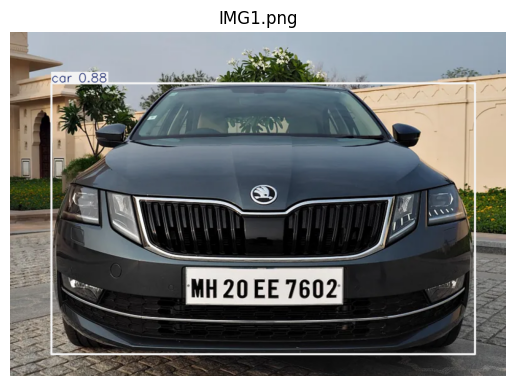


0: 352x640 1 person, 2 cars, 2207.0ms
Speed: 4.3ms preprocess, 2207.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


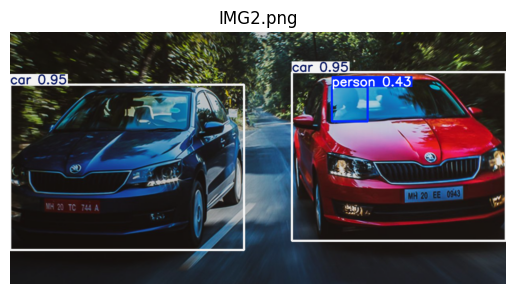


0: 384x640 1 car, 2358.9ms
Speed: 4.4ms preprocess, 2358.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


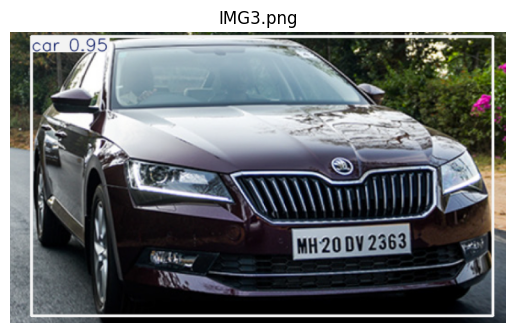


0: 416x640 2 persons, 5 cars, 2555.8ms
Speed: 4.1ms preprocess, 2555.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


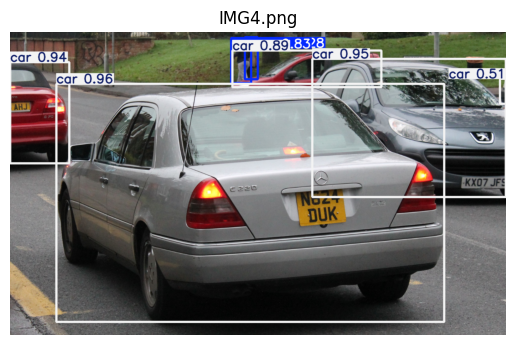


0: 384x640 4 persons, 3 motorcycles, 1 bus, 3 trucks, 3309.7ms
Speed: 3.2ms preprocess, 3309.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


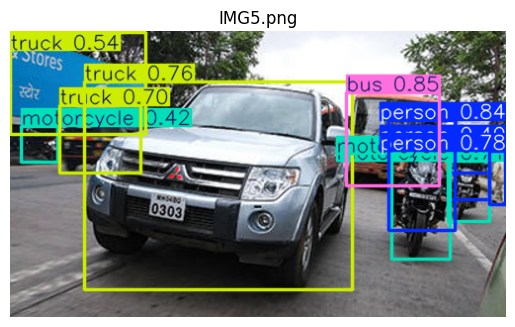


0: 576x640 1 bus, 1 truck, 4149.3ms
Speed: 4.9ms preprocess, 4149.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


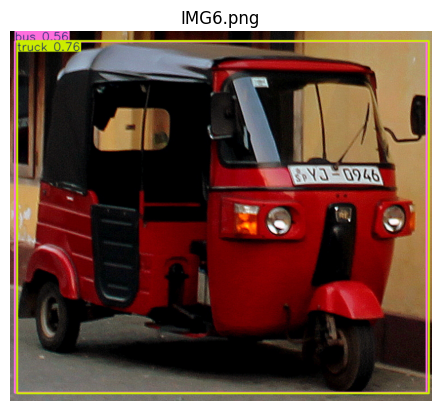

In [ ]:
import os

# Set the folder path
folder_path = "/content/drive/MyDrive/DATA"

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO('yolov8x.pt')

# Folder path
folder_path = "/content/drive/My Drive/DATA"

# Loop through images
for file_name in os.listdir(folder_path):
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        file_path = os.path.join(folder_path, file_name)

        # Read the image
        image = cv2.imread(file_path)
        results = model(image)

        # Get the annotated frame
        annotated_image = results[0].plot()  # Use the first result for the image

        # Display using Matplotlib
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(file_name)
        plt.show()

In [ ]:
vehicle_classes = [1, 2, 3, 4, 5, 6]

for file_name in os.listdir(folder_path):
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        file_path = os.path.join(folder_path, file_name)
        image = cv2.imread(file_path)
        results = model(image)

        vehicle_count = {cls: 0 for cls in vehicle_classes}  # Initialize counters

        # Count vehicles
        for result in results:
            for box in result.boxes:
                cls = int(box.cls)
                if cls in vehicle_classes:
                    vehicle_count[cls] += 1

        print(f"Vehicle Count for {file_name}: {vehicle_count}")



0: 448x640 1 car, 3550.7ms
Speed: 3.7ms preprocess, 3550.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Vehicle Count for IMG1.png: {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0}

0: 352x640 1 person, 2 cars, 3682.9ms
Speed: 3.4ms preprocess, 3682.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
Vehicle Count for IMG2.png: {1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0}

0: 384x640 1 car, 2348.0ms
Speed: 4.0ms preprocess, 2348.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Vehicle Count for IMG3.png: {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0}

0: 416x640 2 persons, 5 cars, 2818.7ms
Speed: 4.8ms preprocess, 2818.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Vehicle Count for IMG4.png: {1: 0, 2: 5, 3: 0, 4: 0, 5: 0, 6: 0}

0: 384x640 4 persons, 3 motorcycles, 1 bus, 3 trucks, 3715.3ms
Speed: 3.0ms preprocess, 3715.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Vehicle Count for IMG5.png: {1: 0, 2: 0, 3: 3,